In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f_train = '../data/train.csv'
f_test = '../data/test.csv'

In [3]:
train = pd.read_csv(f_train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [4]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [5]:
train.isnull().sum(axis=0).sum()

0

__Data looks clean, no missing value, and the numerical varaible are all well normalized into between 0 and 1__

In [6]:
test = pd.read_csv(f_test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [7]:
test.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000
mean,294067.153442,0.494447,0.506939,0.498255,0.492334,0.487640,0.492188,0.485945,0.487401,0.486015,0.498909,0.494360,0.494033,0.495086,0.495586
std,170098.335649,0.187961,0.206837,0.201746,0.210815,0.209119,0.205574,0.178650,0.199549,0.182134,0.185950,0.210399,0.210148,0.213108,0.222613
min,4.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.178568
25%,146414.250000,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.352087,0.317960,0.358970,0.364580,0.310961,0.318249,0.315758,0.294752
50%,294306.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.441525,0.438893,0.441060,0.441450,0.466720,0.457203,0.462286,0.363547,0.406104
75%,441800.000000,0.626630,0.681761,0.634224,0.652072,0.643315,0.659261,0.591284,0.629180,0.568890,0.619840,0.678924,0.682413,0.689974,0.724791
max,587634.000000,0.984975,0.862654,0.944251,0.956046,0.983107,0.997162,1.000000,0.982800,0.995400,0.994980,0.997830,0.997416,0.988494,0.844814


In [8]:
test.isnull().sum(axis=0).sum()

0

__the test data looks like also clean and normalized__

In [9]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [10]:
def count_type(row):
    tp_dic = {}
    for item in row:
        tp = type(item)
        if tp not in tp_dic:
            tp_dic[tp] = 0
        tp_dic[tp] += 1
    for tp, val in tp_dic.iteritems():
        print '{}: {}'.format(tp, val)

count_type(test.drop('id', axis=1).ix[0])

<type 'str'>: 116
<type 'numpy.float64'>: 14


In [11]:
def check_cat_match():
    cats = ['cat{}'.format(i+1) for i in xrange(116)]
    count = 0
    unmatch = []
    cnt_dic = {}
    for cat in cats:
        s_tr = set(train[cat])
        s_t = set(test[cat])
        cnt_dic[cat] = len(s_tr.union(s_t))
        if s_tr != s_t:
            unmatch.append(cat)
        else:
            count += 1
    if count == 116:
        print 'all match'
    else:
        print 'unmatched categroty:'
        print ' '.join(unmatch)
        print 'total:', len(unmatch)
    return unmatch, cnt_dic
unmatch, cat_num = check_cat_match()

unmatched categroty:
cat89 cat90 cat92 cat96 cat99 cat101 cat102 cat103 cat105 cat106 cat109 cat110 cat111 cat113 cat114 cat116
total: 16


In [12]:
def check_cat_num(cat_num):
    lg_cat = []
    cat_sum = 0
    for cat, val in cat_num.iteritems():
        if val != 2:
            print cat, val
            lg_cat.append(cat)
            cat_sum += val
    print '\n{} have 2 category\n{} have more than 2 category'.format(132-len(lg_cat), len(lg_cat))
    print '\npotential categories number:', cat_sum
    return lg_cat
lg_cat = check_cat_num(cat_num)

cat114 19
cat115 23
cat116 349
cat110 134
cat111 17
cat112 51
cat113 63
cat109 85
cat108 11
cat103 14
cat102 9
cat101 19
cat100 15
cat107 20
cat106 18
cat105 20
cat104 17
cat78 4
cat79 4
cat74 3
cat75 3
cat76 3
cat77 4
cat73 3
cat81 4
cat80 4
cat83 4
cat82 4
cat85 4
cat84 4
cat87 4
cat86 4
cat89 9
cat88 4
cat92 9
cat93 5
cat90 7
cat91 8
cat96 9
cat97 7
cat94 7
cat95 5
cat98 5
cat99 17

88 have 2 category
44 have more than 2 category

potential categories number: 1032


**There are 14 numerical features, and 116 categorical feature. 16 of the categorical feature are NOT matched in training and test set, means some value of category appeared in test set are not showed in train set, vice versa.**  
**88 are only 2 category, which can consider transform to binary varible, the rest 44 might have to convert to integer number. If use dummy varible, the features can be over 1000.**

In [13]:
train['cat110'].value_counts()

CL    25305
EG    24654
CS    24592
EB    21396
CO    17495
BT    16365
EL     9236
BC     4131
DW     3640
CQ     3271
DX     3096
AI     2965
BP     2867
W      2703
C      2681
AC     2611
CM     1925
BS     1920
DK     1745
V      1692
A      1296
EE     1185
EF     1159
CI     1066
DM      796
CR      767
AM      643
AD      626
AP      576
T       529
      ...  
BY        8
CW        8
H         8
AG        7
CX        6
BB        6
DB        4
EK        4
BU        4
AH        4
DD        3
Q         3
DT        3
AN        3
AF        3
EI        2
DN        2
CU        2
EJ        2
BN        2
BV        2
BK        1
EH        1
AS        1
CB        1
BD        1
BM        1
DV        1
BI        1
S         1
Name: cat110, dtype: int64

In [14]:
import matplotlib
matplotlib.style.use('ggplot')

In [15]:
y = train['loss']

In [30]:
from scipy.stats import norm, gamma, beta
def fit_plot(y):
    mu, std = norm.fit(y)

    xmin, xmax = y.min(), y.max()
    x = np.linspace(xmin, xmax, 500)
    n = norm.pdf(x, mu, std)
    plt.figure()
    plt.hist(y, bins=100, normed=True, alpha=0.7, label='data')
    plt.plot(x, n, label='normal')
    plt.legend()
    plt.show()

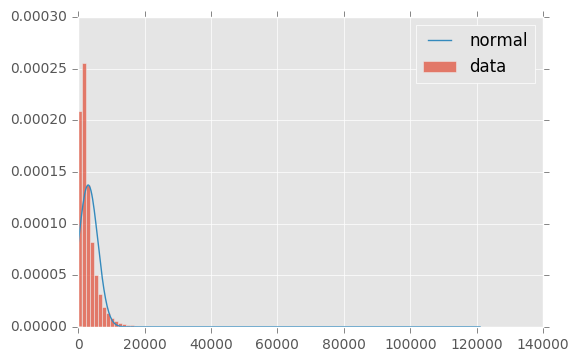

In [31]:
fit_plot(y)

In [32]:
y.describe()

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

In [33]:
y_1 = y[y<15000]

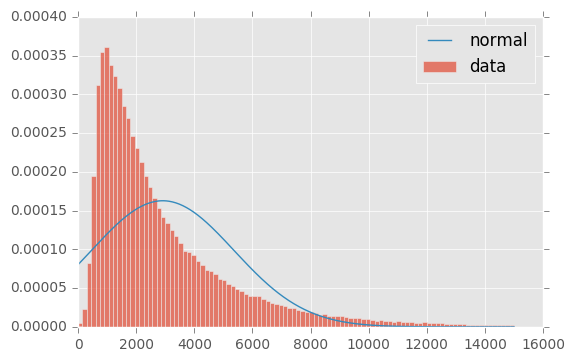

In [34]:
fit_plot(y_1)

In [35]:
y_1.describe()

count    186906.000000
mean       2911.075867
std        2450.955817
min           0.670000
25%        1198.992500
50%        2099.190000
75%        3804.200000
max       14999.710000
Name: loss, dtype: float64

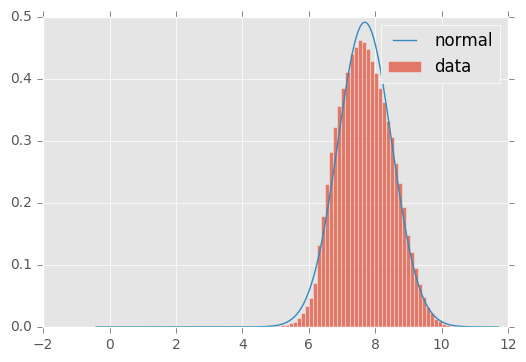

In [36]:
fit_plot(np.log(y))

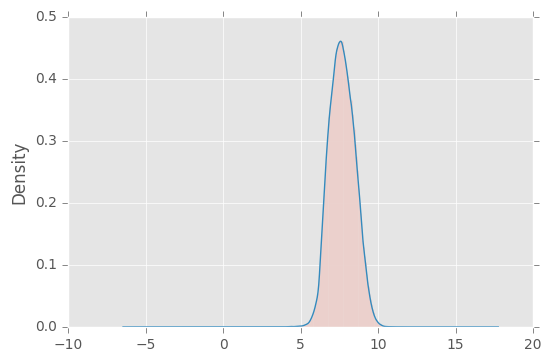

In [45]:
np.log(train['loss']).plot(kind='hist', bins=200, normed=True)
np.log(train['loss']).plot(kind='kde')